**Выбор потенциально успешных для продвижения компьютерных игр**

# Вводная часть

**Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Составить портрет пользователя каждого региона.**

Перед нами данные до 2016 года. Планируем кампанию на 2017-й. 

**План процесса:**

**1. Знакомство с данными и формирование плана необходимых действий по подготовке к работе.**

**2. Подготовка данных.**
1.	Замена названия столбцов (приведение к нижнему регистру).

2.	Преобразование данных в нужные типы с представлением пояснений.

3.	Обработка пропусков при необходимости:

3.1	объяснение, почему заполнили пропуски определённым образом или почему не стали это делать.

3.2	Описание причин, которые могли привести к пропускам.

4.	Аббревиатура 'tbd' в столбце с оценкой пользователей потребует отдельного внимания (разбор значения и описание, как его обработать).

5.	Расчёт суммарных продаж во всех регионах с созданием отдельного столбца.

**3. Проведение исследовательского анализа данных.**

3.1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

3.2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3.3. Возьмём данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  Не будем учитывать в работе данные за предыдущие годы.

3.4. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

3.5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам с описанием результата.

3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

3.7. Соотнесём выводы с продажами игр на других платформах.

3.8. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Составим портрет пользователя каждого региона.**

Определим для пользователя каждого региона следующие позиции (NA, EU, JP):

4.1.Самые популярные платформы (топ-5). Опишем различия в долях продаж.

4.2. Самые популярные жанры (топ-5). Поясним разницу.

4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе? ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**5. Проверим гипотезы.**

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные.

Зададим самостоятельно пороговое значение alpha и поясним: как сформулировали нулевую и альтернативную гипотезы; 
Какой критерий применили для проверки гипотез и почему.

**6. Общий вывод**

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

1.[Пункт в содержании](#id_1)

<a id = id_1></a>
#### Пункт в содержании

In [23]:
#  импорт библиотек
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [24]:
#Снижает размерность чисел для вывода на экран на всем проекте + помогает с экспоненциальной записью чисел
pd.options.display.float_format = '{:,.2f}'.format


# Знакомство с данными и формирование плана необходимых действий по подготовке к работе. Подготовка данных.

In [25]:
# чтение файла
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


К исследованию представлен датафрейм, содержащий 16715 строк и 11 столбцов. Очевидны пропуски. Для определения процентного соотношения пропусков в различных группах данных применим цикл:

In [26]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
NA_sales - 0%
EU_sales - 0%
JP_sales - 0%
Other_sales - 0%
Critic_Score - 51%
User_Score - 40%
Rating - 40%


In [27]:
# КОД РЕВЬЮЕРА

pd.DataFrame(df.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
Critic_Score,51.320000
Rating,40.480000
User_Score,40.090000
Year_of_Release,1.610000
Genre,0.010000
Name,0.010000
Other_sales,0.000000
JP_sales,0.000000
EU_sales,0.000000
NA_sales,0.000000


In [28]:
# исследование пропусков
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Необходимо:

согласно заданию привести к нижнему регистру наименования столбцов;

в столбцах Name и Genre содержится по 2 пропуска, я их удалю;

в Year_of_Release и в столбцах со значением пропусков 40% и более, я проставлю '-1', как символ отсутствия данных в столбцах  с информацией о рейтингах;

столбец Critic_Score подвергнется замене типа данных на целочисленный.

In [29]:
# приведение к нижнему регистру наименования столбцов
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наименования приведены к нижнему регистру

In [30]:
# составим список признаков, у которых более 95% строк содержат одно и то же значение
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
    print('{0}: {1:.5f}%'.format(col, top_pct*100))
    print(cnts)
    print()

name: 0.07179%
Need for Speed: Most Wanted                            12
LEGO Marvel Super Heroes                                9
Ratatouille                                             9
Madden NFL 07                                           9
FIFA 14                                                 9
                                                       ..
An American Tail: Fievel's Gold Rush                    1
Art of Fighting Anthology                               1
Mario Party 4                                           1
Deus Ex                                                 1
The Book of Unwritten Tales: The Critter Chronicles     1
Name: name, Length: 11560, dtype: int64

platform: 12.92851%
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98


Анализом неинформативности установлено, что высокой уникальностью обладает столбец Name — название игры и это приципиально важно для нашего анализа. Остальные исследуемые группы имеют неуникальное содержание по объективным причинам(повторение наименование жанра или года выпуска).

По признаку релеватности все столбцы содержат данные, влияющие на результат. Удаление столбцов не требуется.

In [31]:
df.duplicated(keep = False).sum()

0

In [32]:
df.duplicated(['name','platform'],keep = False).sum()

10

In [33]:
duplicated_df = df[df.duplicated(['name','platform'],keep = False)].head() #результат — датафрейм с дубликатами
print(duplicated_df) 

                             name platform  year_of_release     genre  \
604                 Madden NFL 13      PS3         2,012.00    Sports   
659                           NaN      GEN         1,993.00       NaN   
1190  Need for Speed: Most Wanted     X360         2,012.00    Racing   
1591  Need for Speed: Most Wanted     X360         2,005.00    Racing   
1745           Sonic the Hedgehog      PS3         2,006.00  Platform   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
604       2.11      0.22      0.00         0.23         83.00        5.5   
659       1.78      0.53      0.00         0.08           NaN        NaN   
1190      0.62      0.78      0.01         0.15         83.00        8.5   
1591      1.00      0.13      0.02         0.10         83.00        8.5   
1745      0.41      0.06      0.04         0.66         43.00        4.1   

     rating  
604       E  
659     NaN  
1190      T  
1591      T  
1745   E10+  


In [34]:
df[df.duplicated(['name','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


In [35]:
# КОД РЕВЬЮЕРА

df[df.name == "Madden NFL 13"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,"2,012.00",Sports,2.53,0.15,0.00,0.17,81.00,5.8,E
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
3986,Madden NFL 13,Wii,"2,012.00",Sports,0.47,0.00,0.00,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,"2,012.00",Sports,0.28,0.00,0.00,0.02,63.00,7.3,E
7066,Madden NFL 13,WiiU,"2,012.00",Sports,0.21,0.00,0.00,0.02,75.00,6.7,E
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px;border: 1px solid ">
<h2> Комментарий ревьюера 2 ⚠️</h2>
    
    
Я вижу одинаковый год. Посмотрим все: </div>

In [36]:
# КОД РЕВЬЮЕРА

df[df[['name','platform']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,"2,012.00",Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1745,Sonic the Hedgehog,PS3,"2,006.00",Platform,0.41,0.06,0.04,0.66,43.00,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
11715,Need for Speed: Most Wanted,PC,"2,012.00",Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,"2,012.00",Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


Приведённый датафрейм не содержит дубликатов.

**Проведу исследование столбцов по отдельности**

In [37]:
# 1. столбец name, уникальные значения
df['name'].value_counts()

Need for Speed: Most Wanted                            12
FIFA 14                                                 9
Ratatouille                                             9
Madden NFL 07                                           9
LEGO Marvel Super Heroes                                9
                                                       ..
Ochaken no Heya DS 2                                    1
Checkers                                                1
International Superstar Soccer Pro '98                  1
Mighty Beanz: Pocket Puzzles                            1
The Book of Unwritten Tales: The Critter Chronicles     1
Name: name, Length: 11559, dtype: int64

In [38]:
df.loc[df['name'] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,"2,005.00",Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,"2,012.00",Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,"2,005.00",Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,"2,012.00",Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,"2,005.00",Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6273,Need for Speed: Most Wanted,WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,"2,005.00",Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


In [39]:
display(df.loc[df['name'] == "Need for Speed: Most Wanted"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,"2,005.00",Racing,2.03,1.79,0.08,0.47,82.00,9.1,T
523,Need for Speed: Most Wanted,PS3,"2,012.00",Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,"2,012.00",Racing,0.62,0.78,0.01,0.15,83.00,8.5,T
1591,Need for Speed: Most Wanted,X360,"2,005.00",Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
1998,Need for Speed: Most Wanted,XB,"2,005.00",Racing,0.53,0.46,0.00,0.05,83.00,8.8,T
2048,Need for Speed: Most Wanted,PSV,"2,012.00",Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,"2,005.00",Racing,0.43,0.11,0.00,0.02,80.00,9.1,T
5972,Need for Speed: Most Wanted,PC,"2,005.00",Racing,0.02,0.23,0.00,0.04,82.00,8.5,T
6273,Need for Speed: Most Wanted,WiiU,"2,013.00",Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,"2,005.00",Racing,0.24,0.01,0.00,0.02,45.00,6.1,E


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Очень хорошо выводит таблицы метод **display**. Кроме того, если команда на вывод в ячейке одна, то можно сразу ее и писать. Уверена, ты это и без меня прекрасно знаешь, я лишь напоминаю :)     
</div>

In [40]:
# удаление немногочисленных пропусков в name и genre
df.dropna(subset=['name', 'genre'], inplace=True)

In [41]:
df['name'].isna().sum()

0

Записи, имеющие полный дубль в названии, не являются дублями в остальном содержании, это для утверждения во мнении, т.к. данный вопос исследовался выше.

In [42]:
# 2 platform
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [43]:
df['platform'].describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

в столбце platform отсутствуют пропуски, 31 уникальное значение, замена типа данных не требуется

In [44]:
(df.groupby(df['platform']).size() / len(df['platform'])).to_frame().style.format('{:.2%}')


,0
platform,
2600,0.80%
3DO,0.02%
3DS,3.11%
DC,0.31%
DS,12.87%
GB,0.59%
GBA,4.92%
GC,3.33%
GEN,0.16%


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Скорее всего потому, что метод форматирования выдает нам уже не числа, а строки. Если добавить к коду выше сортировку и запустить, то интерпретатор нам вежливо сообщит, что у styler-а нет метода сортировки. Что наталкивает на мысль сначала отсортировать, а потом отформатировать :) Ниже выведу.  </div>

In [45]:
# КОД РЕВЬЮЕРА

(df.groupby(df['platform']).size() / len(df['platform'])).to_frame().sort_values(by=0).style.format('{:.2%}')


,0
platform,
GG,0.01%
PCFX,0.01%
TG16,0.01%
3DO,0.02%
WS,0.04%
SCD,0.04%
NG,0.07%
GEN,0.16%
DC,0.31%


In [46]:
#3 year_of_release, замена пропусков 
df['year_of_release'] = df['year_of_release'].fillna(-1)

In [47]:
# year_of_release, замена типа данных 
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [48]:
#4 genre, описание
df['genre'].describe()

count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object

In [49]:
#4 genre, замена пропусков в genre на "untitled", для максимального сохранения объёма данных
df['genre'] = df['genre'].fillna("untitled")

в столбце genre пропуски заполнены, 12 уникальных значений, замена типа данных не требуется.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#4-7  Сведения о продажах 'na_sales', 'eu_sales', 'jp_sales', 'other_sales' содержат данные в млн. проданных копий, замена типа данных не требуется, пропусков нет.

In [51]:
df['critic_score']

0       76.00
1         NaN
2       82.00
3       80.00
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16713, dtype: float64

In [52]:
#9 critic_score,замена типа данных и пропусков, т к максимальный балл 100. Проставление отметки об отсутствии сведений
df['critic_score']=df['critic_score'].fillna(-1)
df['critic_score']=df['critic_score'].astype(int)

In [53]:
df['critic_score']

0        76
1        -1
2        82
3        80
4        -1
         ..
16710    -1
16711    -1
16712    -1
16713    -1
16714    -1
Name: critic_score, Length: 16713, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [55]:
# 10 user_score, # замена типа данных и пропусков
df['user_score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: user_score, Length: 96, dtype: int64

Наиболее часто встречается аббривеатура tbd, в разговороном английском "будет определено", "будет обсуждаться". Согласно словарю терминов (глоссарий) по разработке требований (Вигерс, 2013, https://analytics.infozone.pro/requirements-analysis/glossary-requirements-development-wiegers-2013/) - служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Таким образом, можно предположить, что данная отметка говорит о том, что формирование рейтинга ещё не завершено. Я его заменю на -1, как и в иных случаях неопределённости. 

In [56]:
# замена типа данных на вещественный, т к оценки представлены дробью,
# пропусков и tbd на отметку об отсутствии сведений -1
df['user_score']=df['user_score'].fillna(-1)
df['user_score']=df['user_score'].replace('tbd',-1)
df['user_score']=df['user_score'].astype(float)
df['user_score'].value_counts()

-1.00    9123
7.80      324
8.00      290
8.20      282
8.30      254
         ... 
0.70        2
0.20        2
1.00        2
9.70        1
0.00        1
Name: user_score, Length: 96, dtype: int64

In [57]:
# 11 rating, получение уникальных значений и их количества
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

https://zen.yandex.ru/media/id/5c46b2a483b63e00b5f42caa/sistema-vozrastnyh-igrovyh-reitingov-v-ssha-5c541347f583af00ad202526/

Назначающей возрастной рейтинг для игр в Штатах является организация ESRB ( "доска рейтингов развлекательных программ"), которая и решает то, какой рейтинг дать конкретному проекту:

1. EC. Данный рейтинг, как видно из нумерации, является самым мягким из всех и подразумевает ориентированность на детей младшего возраста от трёх лет, ничего жуткого и ужасного вы в играх с таким рейтингом там не найдёте.

2. E. Здесь всё уже более интересно. Рейтинг подразумевает, что любая игра с ним содержит минимальное количество насилия ( и то, мультяшного) и является игрой "для всех", то есть может понравиться и детям (от 6 лет), и взрослым.

3. E10+. Основная разница с предыдущим рейтингом в возрасте потенциального потребителя и чуть большем содержании насилия (опять же, мультяшного и достаточно ненавязчивого).

4. T. Тут уже всё заходит несколько дальше предыдущих рейтингов, игры с таким рейтингом направлены на подростковую аудитория и уже могут содержать умеренное насилие, чисто подростковый юмор и умеренное количество откровенных сцен наряду с редким использованием ненормативной лексики.

5. M. Один из самых желаемых рейтингов среди любителей условно "взрослых" проектов, ввиду того, что позволяет затрагивать любые взрослые темы и ситуации. В играх с таким рейтингом вы можете обнаружить кучу насилия ( не обязательно жёсткого и не обязательно в большом количестве, рейтинг просто развязывает руки для возможности такого), нецензурную лексику, мрачную атмосферу и всё такое прочее. Пожалуй, один из желаемых рейтингов на нынешнем рынке, но всё же не самый желанный.

6. AO. Продукт с таким рейтингом для взрослых и только для взрослых. Как предыдущий, но лучше и качественнее ( не для всех). Другими словами, больше и веселее, отлично подойдёт для тех, кто хочет после тяжёлой работы выплеснуть в виртуальный мир накопившуюся агрессию.

7. RP. Псевдорейтинг, информирующий о том, что нормальный всё ещё ожидается. Можно встретить преимущественно в ранних трейлерах и демо.

In [58]:
# выявлено 3 записи К-А, которые соответствуют обозначению рейтинга Е, переименую
df['rating'] = df['rating'].replace('K-A', 'E') 
# замена типа данных и пропусков
df['rating']=df['rating'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [59]:
#  создам датафрейм с отражением данных о продажах
df_plots = df[['name','na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
df_plots

,name,na_sales,eu_sales,jp_sales,other_sales
0,Wii Sports,41.36,28.96,3.77,8.45
1,Super Mario Bros.,29.08,3.58,6.81,0.77
2,Mario Kart Wii,15.68,12.76,3.79,3.29
3,Wii Sports Resort,15.61,10.93,3.28,2.95
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.00
16711,LMA Manager 2007,0.00,0.01,0.00,0.00
16712,Haitaka no Psychedelica,0.00,0.00,0.01,0.00
16713,Spirits & Spells,0.01,0.00,0.00,0.00


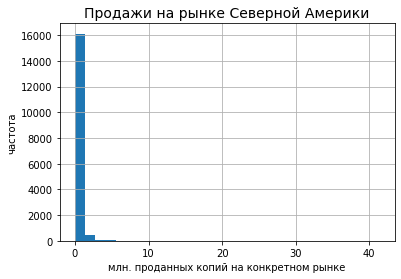

In [60]:
# описательная статистика: оценим наличие выбросов в столбцах с данными о реализации копий игр в различных регионах:
df['na_sales'].hist(bins=30);
plt.xlabel('млн. проданных копий на конкретном рынке');
plt.ylabel('частота');
plt.title('Продажи на рынке Северной Америки', fontsize=14);

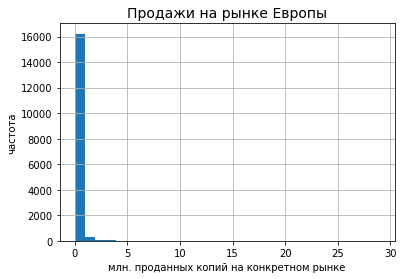

In [61]:
df['eu_sales'].hist(bins=30);
plt.xlabel('млн. проданных копий на конкретном рынке');
plt.ylabel('частота');
plt.title('Продажи на рынке Европы', fontsize=14);

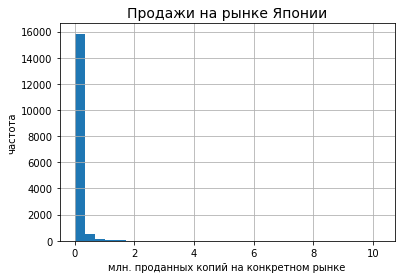

In [62]:
df['jp_sales'].hist(bins=30);
plt.xlabel('млн. проданных копий на конкретном рынке');
plt.ylabel('частота');
plt.title('Продажи на рынке Японии', fontsize=14);

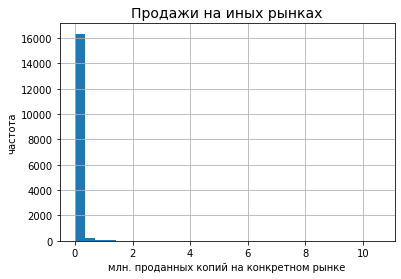

In [63]:
df['other_sales'].hist(bins=30);
plt.xlabel('млн. проданных копий на конкретном рынке');
plt.ylabel('частота');
plt.title('Продажи на иных рынках', fontsize=14);

Всплески в районе 0 - это отсутствие данных о продажах.

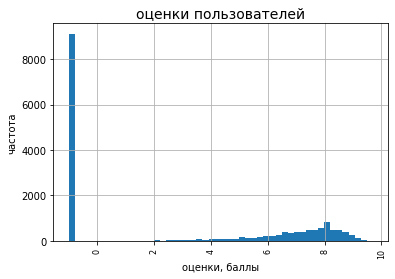

In [64]:
# оценка наличию выбросов в столбцах с данными о рейтингах игр в различных регионах df['user_score']
df['user_score'].hist(bins=50);
plt.title('оценки пользователей', fontsize=14)
plt.xlabel('оценки, баллы');
plt.ylabel('частота');
plt.xticks(rotation=90,fontsize=8);

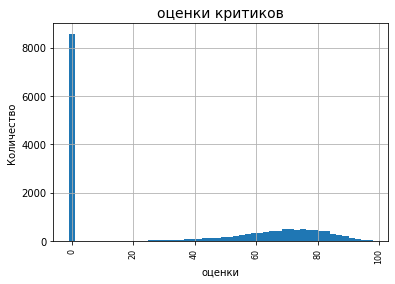

In [65]:
# оценка наличию выбросов в столбцах с данными о рейтингах игр в различных регионах df['critic_score']
df['critic_score'].hist(bins=50);
plt.title('оценки критиков', fontsize=14);
plt.xlabel('оценки');
plt.ylabel('Количество');
plt.xticks(rotation=90,fontsize=8);

Всплески в районе 0 - это отсутствие данных о рейтинге. Само распределение близко к нормальному. Наличие хвоста слева говорит о значительном количестве низких оценок игр.

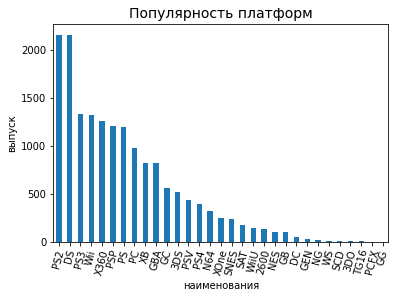

In [66]:
# Посмотрим на столбчатые диаграммы для платформ
df['platform'].value_counts().plot.bar(rot=75);
plt.title('Популярность платформ', fontsize=14);
plt.xlabel('наименования');
plt.ylabel('выпуск');

In [67]:
# оценка популярности платформ
PS2 = df.loc[df['platform'] == 'PS2']['platform'].count()
DS = df.loc[df['platform'] == 'DS']['platform'].count()
print('Две самые популярные платформы:')
print('Доля платформы PlayStation 2:{:.1%}'.format(PS2/len(df['platform'])))
print('Доля платформы Nintendo DS:{:.1%}'.format(DS/len(df['platform'])))

Две самые популярные платформы:
Доля платформы PlayStation 2:12.9%
Доля платформы Nintendo DS:12.9%


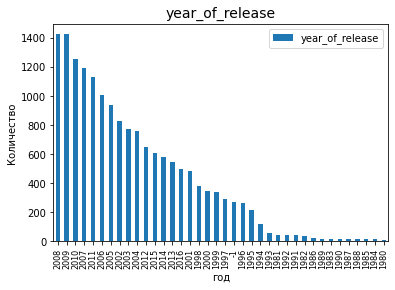

In [68]:
# оценка частоты выхода игр в соответствии с годом релиза
df['year_of_release'].value_counts().plot.bar(rot=75);
plt.title('year_of_release', fontsize=14)
plt.xlabel('год');
plt.ylabel('Количество');
plt.legend();
plt.xticks(rotation=90,fontsize=8);

Самые крупные релизы происходили в 2008 и 2009гг. 

In [69]:
# Расчёт суммарных продаж во всех регионах с созданием отдельного столбца.
df['total_sales'] = df['na_sales']+df['eu_sales']+ df['jp_sales']+ df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.00,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.00,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.00,-1,0.01


In [70]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df['total_sales']

0       82.54
1       40.24
2       35.52
3       32.77
4       31.38
         ... 
16710    0.01
16711    0.01
16712    0.01
16713    0.01
16714    0.01
Name: total_sales, Length: 16713, dtype: float64

In [71]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [72]:
df.duplicated().sum()

0

**Полученный датафрейм не содержит пропусков и дубликатов.**

**Проведены следующие операции:**

1. Знакомство с данными и формирование плана необходимых действий по подготовке к работе.

К исследованию представлен датафрейм, содержащий 16715 строк и 11 столбцов. Очевидны пропуски.

Требовалось выполнение следующих действий:

согласно заданию привести к нижнему регистру наименования столбцов;

в столбцах Name и Genre содержится по 2 пропуска;

в Year_of_Release и в столбцах со значением пропусков 40% и более, будет проставлено '-1', как символ отсутствия данных в столбцах с информацией о рейтингах;

столбец Critic_Score подвергнется замене типа данных на целочисленный.

2. Подготовка данных.

Наименования приведены к нижнему регистру.

Анализом неинформативности установлено, что высокой уникальностью обладает столбец Name — название игры и это приципиально важно для нашего анализа. Остальные исследуемые группы имеют неуникальное содержание по объективным причинам(повторение наименование жанра или года выпуска).

По признаку релеватности все столбцы содержат данные, влияющие на результат. Удаление столбцов не требуется.

Приведённый датафрейм не содержит дубликатов.

В столбце name заменены пропуски удалены, замена типа данных не требуется.

В столбце platform отсутствуют пропуски, 31 уникальное значение, замена типа данных не требуется

В столбце year_of_release произведена замена типа данных и заполнены пропуски.

В столбце genre пропуски уддалены, 12 уникальных значений, замена типа данных не требуется.

Сведения о продажах содержат данные в млн. проданных копий, замена типа данных не требуется, пропусков нет.

Наиболее часто встречается аббривеатура tbd, в разговороном английском "будет определно", "будет обсуждаться". Согласно словарю терминов (глоссарий) по разработке требований (Вигерс, 2013, https://analytics.infozone.pro/requirements-analysis/glossary-requirements-development-wiegers-2013/) - служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Таким образом, можно предположить, что данная отметка говорит о том, что формирование рейтинга ещё не завершено. Проведена замена на -1, как и в иных случаях неопределённости.

В столбце rating выявлено 3 записи К-А, которые соответствуют обозначению рейтинга Е, переименованы. Произведена замена типа данных и пропусков на -1, как и в иных случаях неопределённости.

Дана оценка наличию выбросов в столбцах с данными о реализации копий игр в различных регионах: всплески в районе 0 - это отсутствие данных о продажах.

Дана оценка наличию выбросов в столбцах с данными о рейтингах игр в различных регионах: всплески в районе 0 - это отсутствие данных о продажах.

Две самые популярные платформы:

Доля платформы PlayStation 2:12.93%

Доля платформы Nintendo DS:12.87%

Самые крупные релизы происходили в 2008 и 2009гг.

Добавлен столбец total_sales - совокупные сведения о продажах во всех исследуемых регионах (млн.копий). 

# Проведение исследовательского анализа данных.

## Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


In [74]:
df['year_of_release'].value_counts().sort_index()

-1        269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      60
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: year_of_release, dtype: int64

При такой сортировке видно, что 1994 ознаменовался всплеском продаж. И не удивительно, 10 декабря 1993 выпущена в свет легендарная игра «Doom» в жанре 3D-Action. Эта игра получила широкое распространение, популяризовала и задала основные направления развития жанра 3D-Action. 1994 год -компания «Sony» выпускает свою первую, но очень удачную игровую консоль «PlayStation». Она стала лучшей консолью 5-го поколения. Игры для этой консоли распространялись на CD-дисках. Большинство игр на «PlayStation» были с трёхмерной графикой. Продажи консоли превысили 102 000 000 штук.(https://www.playground.ru/misc/news/istoriya_razvitiya_kompyuternyh_igr_3_chast-114111)

Следующий двукратный скачок в 2002 году был подготовлен немного ранее, в 2001 году компания «Microsoft» выпускает свою игровую приставку «Xbox». Американская консоль не смогла составить серьезную конкуренцию «PlayStation 2», но завоевала определённую популярность в мире. 

Начался бум онлайн игр в Европе и Америке. Значительно увеличивается аудитория онлайн-игроков. Уже созданные онлайн-игры выпускают современные обновления для своих игр. Создаются такие игры, как: World War II Online, «Dark Age of Camelot», «Anarchy Online».

Появляется первый сотовый телефон с поддержкой Java – «Siemens SL45i». Это событие ознаменовало появление на сотовых телефонах множества сторонних программ, в том числе и компьютерных игр. Игры на мобильных устройствах по своему развитию начали повторять путь классических компьютерных игр, но с отставанием 10 – 15 лет.
(https://www.playground.ru/misc/news/istoriya_razvitiya_kompyuternyh_igr_3_chast-114111).

Далее развитие шло постепенно, с взлётами и падениями, пока в 2012 не произошёл серьёзный спад.

2011 год в истории компьютерных игр ознаменовался следующими событиями компания Nintendo представила новую консоль Wii U, совмещающую игровой процесс на основе распознавания движений и графику в формате HD. Компания Nintendo запустила новую портативную приставку 3DS. Пока что это единственная в мире консоль, создающая объемный стереоскопический эффект без очков. Помимо игр в формате 3D, пользователи могут просматривать 3D-видео и делать 3D-фото. 

Однако,нынешнее поколение видеоигр началось с выпуска Wii U от Nintendo в 2012 году, за которым последовали playstation 4 и Xbox One в 2013 году. Несмотря на сенсорный пульт дистанционного управления, который позволял играть вне ТВ и играть в игры Wii, Wii U был коммерческим провалом — противоположностью его конкурентов — и был прекращен в 2017 году.(https://3dnews.ru/622071).

Может быть это и полномасштабное развитие мобильных телефонов и привело к снижению активности продаж на данном рынке. 

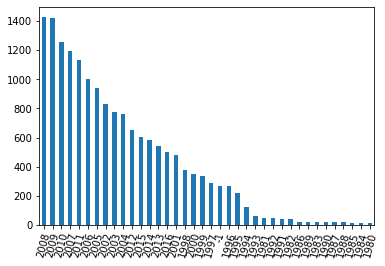

In [75]:
# до сортировки
df['year_of_release'].value_counts().plot.bar(rot=75);

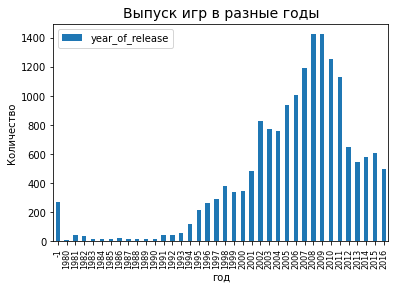

In [76]:
df['year_of_release'].value_counts().sort_index().plot.bar(rot=75);
plt.title('Выпуск игр в разные годы', fontsize=14)
plt.xlabel('год');
plt.ylabel('Количество');
plt.legend();
plt.xticks(rotation=90,fontsize=8);

In [77]:
#  создам датафрейм, который будет содержать информацию об играх, выпущенных до 2000г
df_year_1990 = df.query('year_of_release < 2000')
df_year_1990['name'].value_counts().sum()

2243

In [78]:
# создам датафрейм, который будет содержать информацию об играх, выпущенных после 2000г
df_year_2000 = df.query('year_of_release >= 2000')
df_year_2000['name'].value_counts().sum()

14470

**В 2000-е игры выходят в интернет и становятся широкодоступны; игр, выпущенных до 2000г - 2243; игр, выпущенных после 2000г - 14 470. Для анализа я применю данные из датафрейма df_year_2000** и буду постепенно сужать круг.

In [79]:
# выпуск игр по годам, начиная с 2000
df_year = df_year_2000.groupby('year_of_release')['name'].unique()
df_year

year_of_release
2000    [Pokémon Crystal Version, Final Fantasy IX, Dr...
2001    [Gran Turismo 3: A-Spec, Grand Theft Auto III,...
2002    [Grand Theft Auto: Vice City, Pokemon Ruby/Pok...
2003    [Need for Speed Underground, Mario Kart: Doubl...
2004    [Grand Theft Auto: San Andreas, Gran Turismo 4...
2005    [Nintendogs, Mario Kart DS, Brain Age: Train Y...
2006    [Wii Sports, New Super Mario Bros., Wii Play, ...
2007    [Wii Fit, Halo 3, Super Mario Galaxy, Call of ...
2008    [Mario Kart Wii, Super Smash Bros. Brawl, Gran...
2009    [Wii Sports Resort, New Super Mario Bros. Wii,...
2010    [Kinect Adventures!, Pokemon Black/Pokemon Whi...
2011    [Call of Duty: Modern Warfare 3, Mario Kart 7,...
2012    [Call of Duty: Black Ops II, New Super Mario B...
2013    [Grand Theft Auto V, Pokemon X/Pokemon Y, Call...
2014    [Grand Theft Auto V, Pokemon Omega Ruby/Pokemo...
2015    [Call of Duty: Black Ops 3, FIFA 16, Star Wars...
2016    [FIFA 17, Pokemon Sun/Moon, Uncharted 4: A Thi..

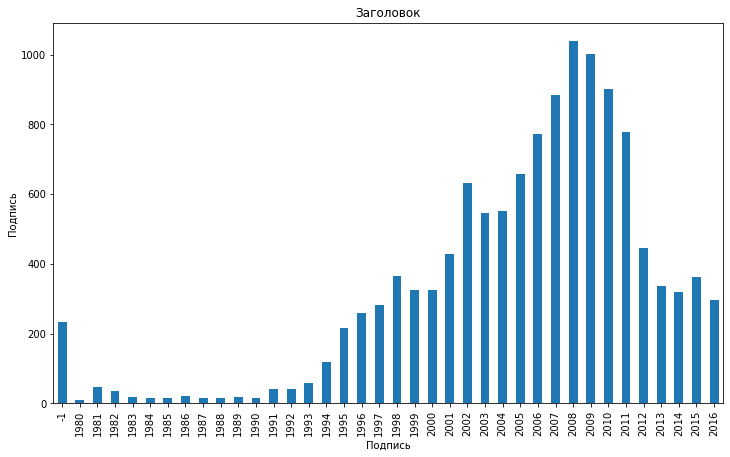

In [82]:
# КОД РЕВЬЮЕРА

df.groupby('year_of_release')['name'].nunique().plot.bar(figsize=(12,7))

plt.title('Заголовок')
plt.xlabel('Подпись')
plt.ylabel('Подпись')
plt.show()

In [56]:
df_year = df_year_2000.groupby('year_of_release')['name'].count()
df_year

year_of_release
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

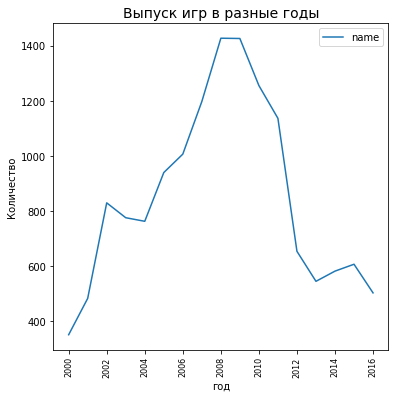

In [58]:
df_year.plot(figsize=(6, 6))
plt.title('Выпуск игр в разные годы', fontsize=14)
plt.xlabel('год');
plt.ylabel('Количество');
plt.legend();
plt.xticks(rotation=90,fontsize=8);

Из приведённого графика видно, что в исследуемом периоде (с 2000г.) резкий подъём начался с 2004г., максимальный выпуск игр пришёлся на период 2008г. - начало 2010г., затем произошёл значительный спад, продолжавшийся до 2013г.

## Посмотрим, как менялись продажи по платформам. 

**Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [59]:
# создам датафрейм, который объединит данные необходимые для ответа на поставленный вопрос
df_platf_sales = df_year_2000[['platform', 'year_of_release', 'total_sales' ]]
df_platf_sales

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91
...,...,...,...
16710,PS3,2016,0.01
16711,X360,2006,0.01
16712,PSV,2016,0.01
16713,GBA,2003,0.01


In [60]:
# создам выборку, которая выявит платформы с наибольшими суммарными продажами
df_pla = df_platf_sales.groupby(['platform'], sort=False)['total_sales'].sum().head(20).reset_index()
df_pla_sort = df_pla.sort_values(by = 'total_sales', ascending = False)
df_pla_sort.head(10)

,platform,total_sales
4,PS2,"1,233.56"
2,X360,961.24
3,PS3,931.34
0,Wii,891.18
1,DS,802.76
6,PS4,314.14
5,GBA,312.88
10,PSP,289.53
7,3DS,257.81
8,XB,251.57


In [61]:
# оставлю топовые 10 платформ
df_pla_sort_top = df_pla_sort.query('total_sales >= 200')
df_pla_sort_top

,platform,total_sales
4,PS2,"1,233.56"
2,X360,961.24
3,PS3,931.34
0,Wii,891.18
1,DS,802.76
6,PS4,314.14
5,GBA,312.88
10,PSP,289.53
7,3DS,257.81
8,XB,251.57


In [62]:
# составлю список топовых платформ
top_platforms = df_pla_sort_top['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'GBA', 'PSP', '3DS', 'XB', 'PC']

In [63]:
# данные о релизе и общей сумме продаж для топовых платформ
df_top =df_platf_sales.query('platform in @top_platforms')
df_top

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91
...,...,...,...
16708,GBA,2002,0.01
16709,PS2,2008,0.00
16710,PS3,2016,0.01
16711,X360,2006,0.01


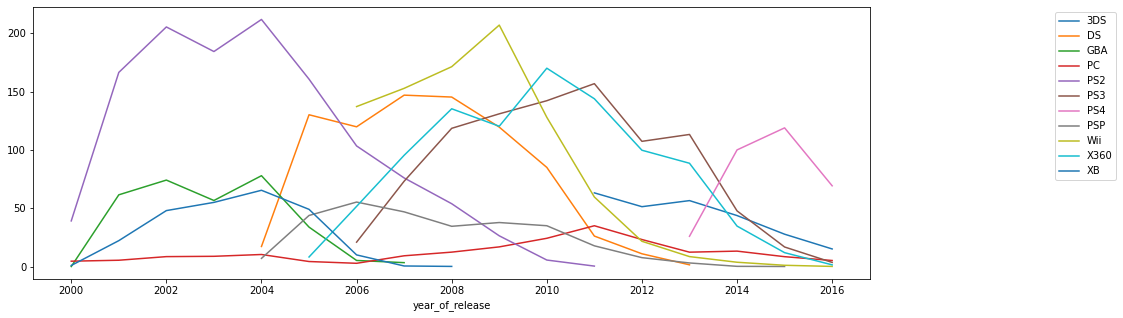

In [64]:
# визуализация данных о релизе и общей сумме продаж для топовых платформ
df_top.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5));
plt.legend(bbox_to_anchor=(1.3, 1))

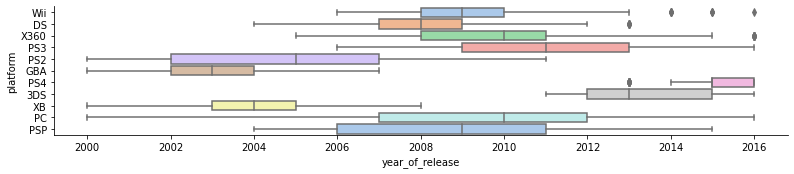

In [65]:
# визуализация данных о релизе и общей сумме продаж для топовых платформ
for column in ['year_of_release']:    
    g = sns.catplot(y='platform', x=column, kind="box", data=df_top, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)

In [66]:
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [67]:
# данные о продажах на топовых платформах сформированные по годам
df_top_mop = df_top.pivot_table(index = 'platform',columns = 'year_of_release', aggfunc = {'sum'}, fill_value='-')
df_top_mop

total_sales                                                   \
                        sum                                                    
year_of_release        2000   2001   2002   2003   2004   2005   2006   2007   
platform                                                                       
3DS                       -      -      -      -      -      -      -      -   
DS                        -      -      -      -  17.27 130.14 119.81 146.94   
GBA                    0.07  61.53  74.16  56.67  77.91  33.86   5.28   3.40   
PC                     4.66   5.47   8.57   8.84  10.39   4.37   2.85   9.28   
PS2                   39.17 166.43 205.38 184.31 211.81 160.66 103.42  75.99   
PS3                       -      -      -      -      -      -  20.96  73.19   
PS4                       -      -      -      -      -      -      -      -   
PSP                       -      -      -      -   7.06  43.84  55.32  46.93   
Wii                       -      -      -      -      -      - 137.15 152.77   
X360                      -      -      -      -      -   8.25  51.62  95.41   
XB                     0.99  22.26  48.01  55.04  65.42  49.08  10.04   0.55   

                                                                               
                                                                               
year_of_release   2008   2009   2010   2011   2012   2013   2014   2015  2016  
platform                                                                       
3DS                  -      -      -  63.20  51.36  56.57  43.76  27.78 15.14  
DS              145.31 119.54  85.02  26.18  11.01   1.54      -      -     -  
GBA                  -      -      -      -      -      -      -      -     -  
PC               12.42  16.91  24.28  35.03  23.22  12.38  13.28   8.52  5.25  
PS2              53.90  26.40   5.64   0.45      -      -      -      -     -  
PS3             118.52 130.93 142.17 156.78 107.36 113.25  47.76  16.82  3.60  
PS4                  -      -      -      -      -  25.99 100.00 118.90 69.25  
PSP              34.55  37.78  35.04  17.82   7.69   3.14   0.24   0.12     -  
Wii             171.32 206.97 127.95  59.65  21.71   8.59   3.75   1.14  0.18  
X360            135.26 120.29 170.03 143.84  99.74  88.58  34.74  11.96  1.52  
XB                0.18      -      -      -      -      -      -      -     -

Проведём анализ полученной сводной таблицы:

жизненный цикл измеряю интенсивностью продаж

3DS 2011-2016 5 лет

DS 2004-2013 7 лет

GBA 2000-2007 7 лет

PC 2000-2016 16 лет

PS2 2000-2011 11 лет

PS3 2006-2016 10 лет

PS4 2013-2016 3 года (но это просто обрыв исследуемого периода)

PSP 2004-2015 11 лет

Wii	2006-2016 10 лет

X360 2005-2016 11 лет

XB 2000-2008 8 лет

**Совершенно очевидно, что средняя продолжительность "жизни" платформы около 10 лет**.

**Актуальный период можно сузить до 2006-2016гг**

## Выберем несколько потенциально прибыльных платформ.

Условие: Возьмём данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

Возьмем в качестве перивчного актуального периода для рассмотрения  2006-2016гг. Внутри этого периода отдельно можно выделить данные после 2013г, когда последствия мирового финансового кризиса постепенно сгладились и позволили рынку снова расти. В этот же период получил развитие инди-сектор, который доказал, что постановка и не вылизанная графика делает игру интересной. На первое место ставят идею. Лучшими представителями такого жанра можно назвать Braid, World of Goo, FeZ, Hotline Miami, The Binding of Isaac, Super Meat Boy и Minecraft. Успешность последнего можно вообще не комментировать (https://club.dns-shop.ru/blog/t-64-videoigryi/40259-kratkaya-istoriya-igrovyih-trendov-2000-2020-ot-ploskoi-grafiki-k/). 

Исследуемое поколение видеоигр началось с выпуска Wii U от Nintendo в 2012 году, за которым последовали playstation 4 и Xbox One в 2013 году. Плюс широкое распространение мобильных платформ и перевыпуск для мобильных устройств игр получает свой толчок. **Я приму к исследованию для прогнозирования период с 2014 по 2016гг**.

### Какие платформы лидируют по продажам, растут или падают? 

In [68]:
# мой дафрейм для работы в период 2014-2016гг.
df_work_14_16 = df.query('year_of_release >= 2014')
df_work_14_16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.00,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.00,-1,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.00,-1,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01


In [69]:
# сортировка
df_work_14_16['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

In [130]:
# поиск наиболее продаваемых платформ
df_14_16 = df_work_14_16.groupby(['platform'], sort=False)['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False)
df_14_16.style.background_gradient('coolwarm')

,platform,total_sales
0,PS4,288.150000
2,XOne,140.360000
1,3DS,86.680000
4,PS3,68.180000
5,X360,48.220000
3,WiiU,42.980000
6,PC,27.050000
8,PSV,22.400000
7,Wii,5.070000
9,PSP,0.360000


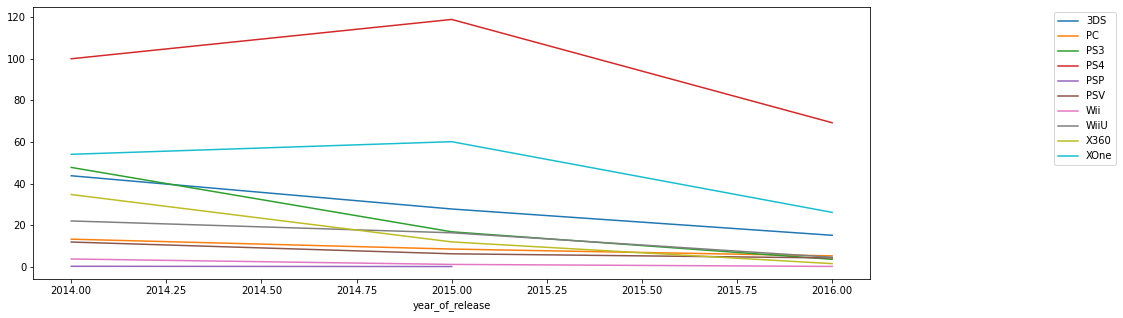

In [71]:
# динамика в исследуемом периоде
df_work_14_16.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5));
plt.legend(bbox_to_anchor=(1.3, 1));

В 2014-2016гг все отобранные платформы демонстрировали устойчивую тенденцию к снижению объёмов реализации. Что и неудивительно, учитывая внедрение мобильных телефонов и других портативных устройств.

**Наименьший, хотя и значительный темп падения уровня продаж демонстрирует PS4.**

**Лидерами продаж установлены (млн. копий):**

PS4	288.15;
XOne 140.36;
3DS	86.68;
PS3	68.18;
X360 48.22;
WiiU 42.98;
PC	27.05;
PSV	22.40;
Wii	5.07;
PSP	0.36.


In [72]:
# динамика совокупных продаж в исследуемом периоде в виде таблицы
df_mop = df_work_14_16.pivot_table(index = ['year_of_release'],columns = 'platform',values='total_sales', aggfunc = {'sum'}, fill_value='-')
df_mop

sum                                                     
platform          3DS    PC   PS3    PS4  PSP   PSV  Wii  WiiU  X360  XOne
year_of_release                                                           
2014            43.76 13.28 47.76 100.00 0.24 11.90 3.75 22.03 34.74 54.07
2015            27.78  8.52 16.82 118.90 0.12  6.25 1.14 16.35 11.96 60.14
2016            15.14  5.25  3.60  69.25    -  4.25 0.18  4.60  1.52 26.15

In [73]:
# динамика среднего значения продаж в исследуемом периоде в виде таблицы
df_mop_mean = df_work_14_16.pivot_table(index = ['year_of_release'],columns = 'platform',values='total_sales', aggfunc = {'mean'}, fill_value='-')
df_mop_mean

mean                                             
platform         3DS   PC  PS3  PS4  PSP  PSV  Wii WiiU X360 XOne
year_of_release                                                  
2014            0.55 0.28 0.44 1.33 0.02 0.12 0.62 0.71 0.55 0.89
2015            0.32 0.17 0.23 0.87 0.04 0.06 0.28 0.58 0.34 0.75
2016            0.33 0.10 0.09 0.42    - 0.05 0.18 0.33 0.12 0.30

In [74]:
df_work_14_16.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,"1,689.00","1,689.00","1,689.00","1,689.00","1,689.00","1,689.00","1,689.00","1,689.00"
mean,"2,014.95",0.17,0.16,0.06,0.05,30.16,3.01,0.43
std,0.80,0.45,0.47,0.21,0.14,37.11,3.98,1.06
min,"2,014.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.01
25%,"2,014.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.03
50%,"2,015.00",0.02,0.02,0.01,0.01,-1.00,3.40,0.10
75%,"2,016.00",0.12,0.12,0.04,0.04,71.00,7.10,0.35
max,"2,016.00",6.03,6.31,3.18,2.38,97.00,9.30,14.63


In [75]:
# для целей прогноза сокращу обзор до платформ с высокими продажами, по третьему квартилю
df_work_14_16_max = df_work_14_16.query('total_sales >= 0.35' )
df_work_14_16_max.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.00,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.00,-1,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.00,-1,7.98


In [76]:
# список наиболее продаваемых платформ
list_of_max = df_work_14_16_max['platform'].unique();
list_of_max

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV'],
      dtype=object)

###  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам с описанием результата.

In [134]:
# группировка платформ по объёму продаж
max_df_work_14_16 = df_work_14_16_max.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False)
max_df_work_14_16.style.background_gradient('coolwarm')

,platform,total_sales
3,PS4,203.950000
7,XOne,104.730000
5,WiiU,31.920000
0,3DS,19.640000
1,PC,14.910000
6,X360,8.630000
2,PS3,8.290000
4,PSV,1.650000


Нами получен список наиболее продаваемых платформ в 2014-2016гг:

**PS4,XOne,3DS,PS3,X360,WiiU,PC,PSV,Wii**	

In [78]:
max_df_work_14_16.describe() 

,total_sales
count,9.00
mean,68.66
std,82.13
min,4.47
25%,17.12
50%,40.38
75%,70.78
max,263.50


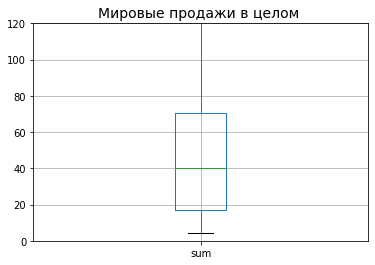

In [79]:
# "ящик с усами" для платформ с высокими продажами в 2014-2016гг.
m_df_work_14_16 = df_work_14_16_max.pivot_table(index = 'platform',values='total_sales', aggfunc = {'sum'}).boxplot()
plt.ylim(0, 120);
plt.title('Мировые продажи в целом ', fontsize=14);

В целом мировые продажи в совокупности составили в среднем от 9 до 50 млн.копий во всех исследуемых регионах мира. 

**В разрезе платформ**

2014-2016гг

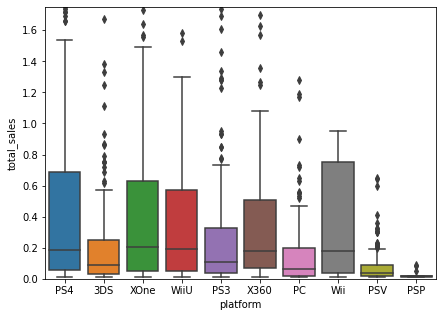

In [80]:
# "ящик с усами" для платформ с высокими продажами за 2014-2016гг.
plt.figure(figsize=(7,5));
plt.ylim(0,1.75);
sns.boxplot(x='platform',y='total_sales',data=df_work_14_16);

В 2014-2016 наибольший средний объём реализации приходился на Wii и доходил почти до 1 млн. копий. На втором месте был PS4, далее XOne, WiiU.

**В разрезе лет**

**2014г**

In [81]:
# датафрейм для 2014г
df_14 = df_work_14_16.query('year_of_release == 2014' )
df_14.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,581.00,581.00,581.00,581.00,581.00,581.00,581.00,581.00
mean,"2,014.00",0.23,0.21,0.07,0.06,31.37,3.29,0.57
std,0.00,0.52,0.52,0.28,0.16,36.82,3.93,1.23
min,"2,014.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.01
25%,"2,014.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,014.00",0.05,0.04,0.01,0.01,-1.00,4.50,0.16
75%,"2,014.00",0.20,0.20,0.05,0.05,71.00,7.10,0.53
max,"2,014.00",4.35,6.31,3.18,1.97,97.00,9.10,12.62


In [82]:
# для целей исследования сокращу обзор до платформ с высокими продажами, по третьему квартилю
df_14_work = df_14.query('total_sales >= 0.53')

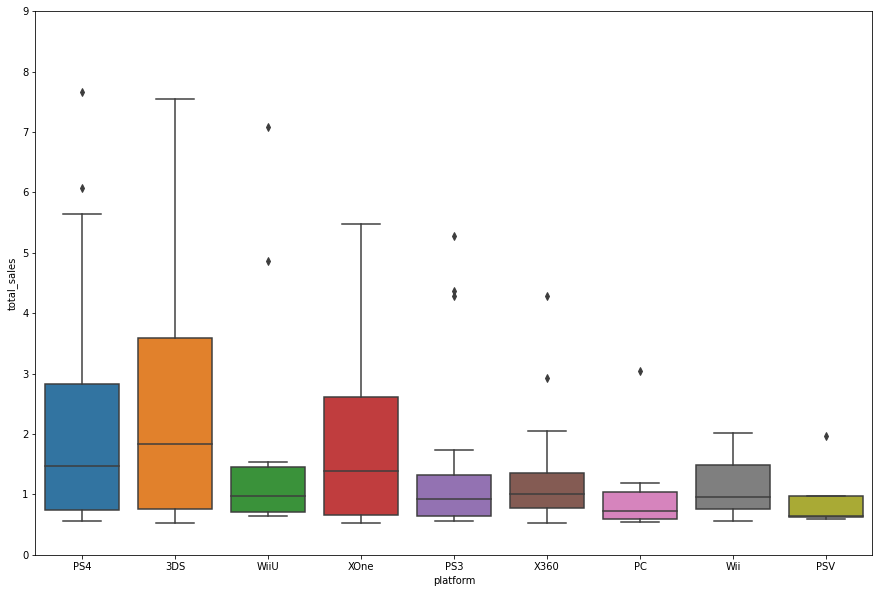

In [83]:
# "ящик с усами" для платформ с высокими продажами за 2014г.
plt.figure(figsize=(15,10));
plt.ylim(0,9);
sns.boxplot(x='platform',y='total_sales',data=df_14_work);

В 2014г лидером по среднему уровню продаж выступала портативная консоль Nintendo 3DS с продажами, подступающими к 4 млн.копий и значительным отклонением в положительную сторону, что свидетельствует о высоком успехе на отдельных рынках. Вторым по значимости игроком была игровая приставка восьмого поколения, выпускаемая японской компанией Sony - PS4, имевшая объём реализации около 2,9 млн.копий и  значительным отклонением в положительную сторону.  XOne - третья по счёту игровая приставка от компании Microsoft, являющаяся преемницей Xbox 360 - демонстрировала схожую динамику от 1,8 до 2,8 млн.копий. 

**2015**

In [84]:
# датафрейм для 2015г
df_15 = df_work_14_16.query('year_of_release == 2015' )
df_15.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00
mean,"2,015.00",0.18,0.16,0.06,0.05,26.43,2.76,0.44
std,0.00,0.49,0.48,0.19,0.16,36.51,3.99,1.10
min,"2,015.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.01
25%,"2,015.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.03
50%,"2,015.00",0.02,0.02,0.01,0.01,-1.00,-1.00,0.09
75%,"2,015.00",0.13,0.12,0.05,0.04,70.00,7.00,0.36
max,"2,015.00",6.03,6.12,2.79,2.38,96.00,9.30,14.63


In [85]:
# для целей исследования сокращу обзор до платформ с высокими продажами, по третьему квартилю
df_15_work = df_15.query('total_sales >= 0.36' )

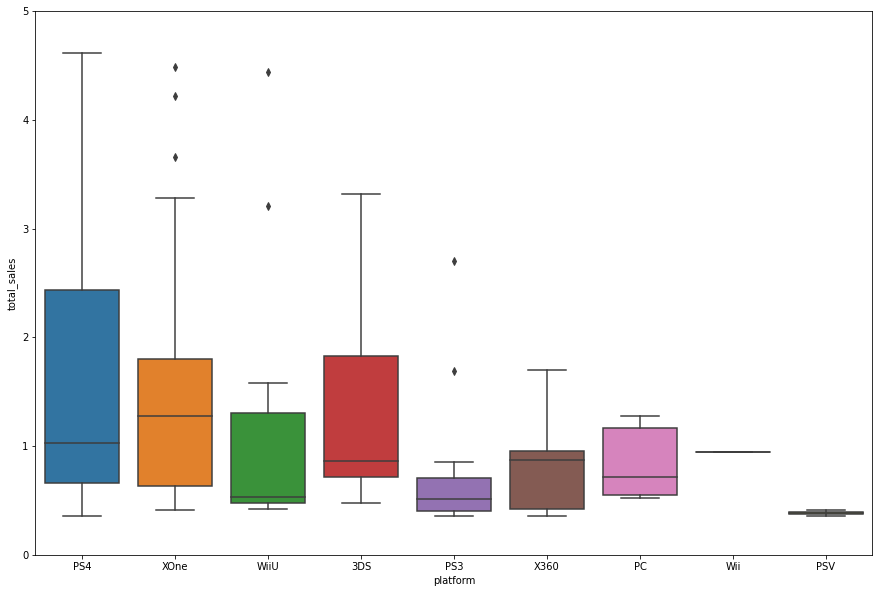

In [136]:
# "ящик с усами" для платформ с высокими продажами за 2015г.
plt.figure(figsize=(15,10));
plt.ylim(0,5);
sns.boxplot(x='platform',y='total_sales',data=df_15_work);

В 2015г лидером по среднему уровню продаж выступала игровая приставка от Sony - PS4, имевшаю объём реализации около 2,5 млн.копий и  значительным отклонением в положительную сторону. Вторым по значимости игроком стала портативная консоль Nintendo 3DS с продажами, около 2 млн.копий и значительным отклонением в положительную сторону, что свидетельствует о высоком успехе на отдельных рынках. И, вновь, третье место - XOne - демонстрировала схожую динамику от 0,8 до 1,8 млн.копий. Очевидно общее падение темпов роста на рынке.

**2016**

In [150]:
# датафрейм для 2016г
df_16 = df_work_14_16.query('year_of_release == 2016' )
df_16.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,502.00,502.00,502.00,502.00,502.00,502.00,502.00,502.00
mean,"2,016.00",0.09,0.10,0.04,0.03,33.27,2.98,0.26
std,0.00,0.26,0.36,0.13,0.09,37.86,4.00,0.70
min,"2,016.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.01
25%,"2,016.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.02
50%,"2,016.00",0.01,0.01,0.00,0.00,-1.00,3.10,0.06
75%,"2,016.00",0.05,0.07,0.03,0.02,73.00,7.10,0.20
max,"2,016.00",2.98,5.75,2.26,1.11,93.00,8.80,7.60


In [151]:
# для целей исследования сокращу обзор до платформ с высокими продажами, по третьему квартилю
df_16 = df_16.query('total_sales >= 0.20' )

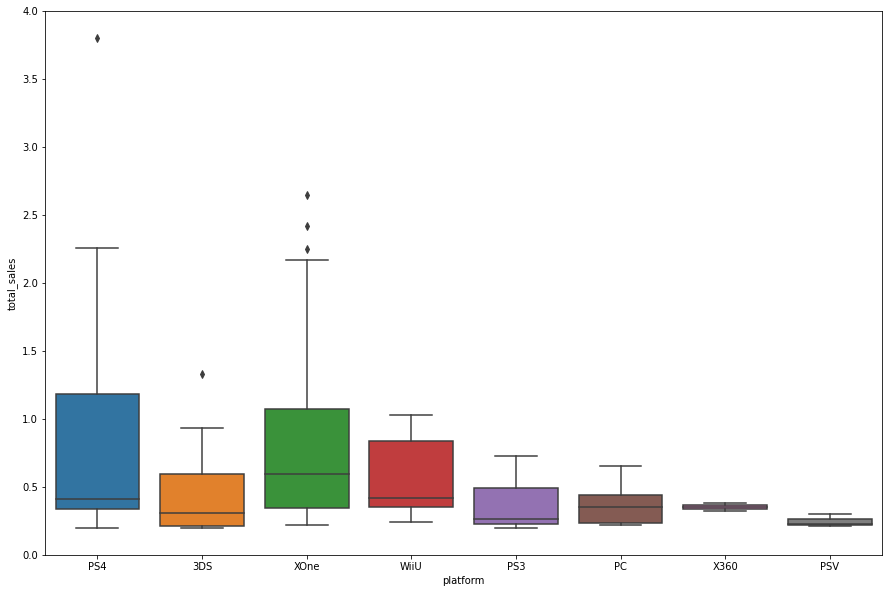

In [155]:
# "ящик с усами" для платформ с высокими продажами за 2016г.
plt.figure(figsize=(15,10));
plt.ylim(0,4);
sns.boxplot(x='platform',y='total_sales',data=df_16);

В 2016г наиболее прибыльные платформы показали следующую динамику: 

реализация PS4 (от японской компании Sony) в среднем составляла от 0,4 до 1,3 млн.копий плюс значительные всплески на отдельных рынках. 

XOne - являющаяся преемницей Xbox 360 - демонстрировала схожую динамику от 0,4 до 1,1 млн.копий. 

WiiU от Nintendo в 2016г потеснила на рынке 3DS c 0,7 млн.копий. 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

In [156]:
df_work_14_16_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 42 to 5295
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             260 non-null    object 
 1   platform         260 non-null    object 
 2   year_of_release  260 non-null    int64  
 3   genre            260 non-null    object 
 4   na_sales         260 non-null    float64
 5   eu_sales         260 non-null    float64
 6   jp_sales         260 non-null    float64
 7   other_sales      260 non-null    float64
 8   critic_score     260 non-null    int64  
 9   user_score       260 non-null    float64
 10  rating           260 non-null    object 
 11  total_sales      260 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 26.4+ KB


In [157]:
df_work_14_16_max

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.70,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.00,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.50,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
5230,Watch Dogs 2,XOne,2016,Action,0.17,0.16,0.00,0.03,83,7.70,M,0.36
5257,Middle-Earth: Shadow of Mordor,PC,2014,Action,0.12,0.20,0.00,0.03,84,8.00,M,0.35
5285,Homefront: The Revolution,PS4,2016,Shooter,0.06,0.21,0.03,0.05,48,3.80,M,0.35
5287,One Piece: Burning Blood,PS4,2016,Fighting,0.11,0.13,0.07,0.05,66,7.80,T,0.36


In [158]:
# КОД РЕВЬЮЕРА

l = {'A':[1,2,4], 'B':[3,3,5]}

df1 = pd.DataFrame(l)

df2 = df1

df3 = df1.copy() 

display(df1, df2, df3)

,A,B
0,1,3
1,2,3
2,4,5


,A,B
0,1,3
1,2,3
2,4,5


,A,B
0,1,3
1,2,3
2,4,5


In [159]:
# КОД РЕВЬЮЕРА

df2.loc[0, 'A'] = 'change2'

df3.loc[1, 'A'] = 'change3'

display(df1, df2, df3)

,A,B
0,change2,3
1,2,3
2,4,5


,A,B
0,change2,3
1,2,3
2,4,5


,A,B
0,1,3
1,change3,3
2,4,5


In [160]:
df_work_14_16_max = df_work_14_16_max.query('critic_score != -1')
df_work_14_16_max = df_work_14_16_max.query('user_score != -1')
df_work_14_16_max = df_work_14_16_max.query('rating != -1')

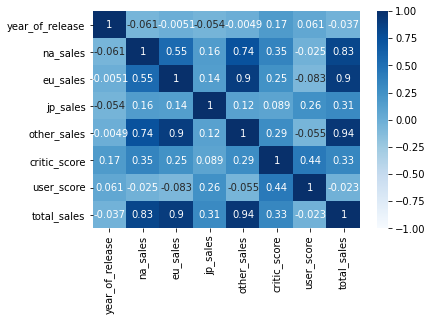

In [161]:
df_work_14_16_max_corr = df_work_14_16_max.corr()
# исследуем корреляции для платформ с высокими продажами 
sns.heatmap(df_work_14_16_max_corr, cmap="Blues", annot=True, vmin=-1, vmax=1);

Корреляция между оценкой пользователей и объёмом продаж в целом для рынка Северной Америки:-0,025

Корреляция между оценкой пользователей и объёмом продаж в целом для рынка Европы:-0,083

Корреляция между оценкой пользователей и объёмом продаж в целом для рынка Японии:0,26

Корреляция между оценкой пользователей и объёмом продаж в целом для иных рынков:-0,055


Корреляция между оценкой критиков и объёмом продаж для рынка Северной Америки:0,35

Корреляция между оценкой критиков и объёмом продаж для рынка Европы:0,25

Корреляция между оценкой критиков и объёмом продаж для рынка Японии:0,089

Корреляция между оценкой критиков и объёмом продаж для иных рынков:0,29


**Таким образом, оценка критиков оказывает прямое и более сильное влияние на продажи игр в мире, нежели отзывы покупателей.**

**Анализ для PS4**

In [94]:
# отобрана платформа
df_sco_ps4 = df_work_14_16_max.loc[df_work_14_16_max['platform'] == 'PS4']

In [95]:
# Корреляция между оценкой критиков и объёмом продаж
df_sco_ps4['critic_score'].corr(df_sco_ps4['total_sales'])
print('Корреляция между оценкой критиков и объёмом продаж для PS4 - {:.2}'.format(df_sco_ps4['critic_score'].corr(df_sco_ps4['total_sales'])))

Корреляция между оценкой критиков и объёмом продаж для PS4 - 0.41


In [96]:
# Корреляция между оценкой пользователей и объёмом продаж
df_sco_ps4['user_score'].corr(df_sco_ps4['total_sales'])
print('Корреляция между оценкой пользователей и объёмом продаж для PS4 - {:.2}'.format(df_sco_ps4['user_score'].corr(df_sco_ps4['total_sales'])))

Корреляция между оценкой пользователей и объёмом продаж для PS4 - -0.096


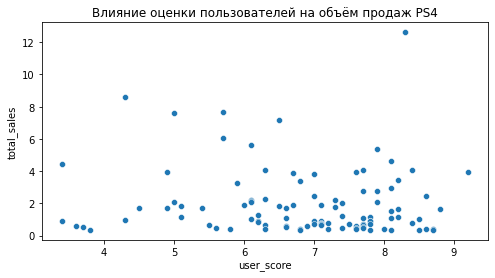

In [97]:
#Построим диаграмму рассеяния user_score
plt.figure(figsize=(8,4))
sns.scatterplot(x='user_score', y='total_sales', data=df_sco_ps4)
plt.title('Влияние оценки пользователей на объём продаж PS4');

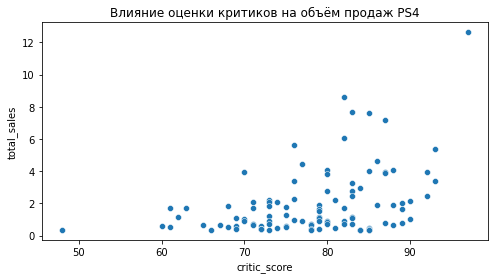

In [98]:
#Построим диаграмму рассеяния critic_score
plt.figure(figsize=(8,4))
sns.scatterplot(x='critic_score', y='total_sales', data=df_sco_ps4)
plt.title('Влияние оценки критиков на объём продаж PS4');

**Вывод для PS4**

Корреляция между оценкой пользователей и объёмом продаж для PS4 - -0.096- обратная слабая корреляция.

Корреляция между оценкой критиков и объёмом продаж для PS4 - 0.41 - прямая корреляция, выраженная.

Таким образом, оценка критиков оказывает прямое и сильное влияние на продажи игр для платформы PS4, в отличие от отзывов покупателей, имеющих обратное влияние.

### Соотнесём выводы с продажами игр на других платформах.

**Анализ для XOne**

In [99]:
# отобрана платформа
df_sco_XOne = df_work_14_16_max.loc[df_work_14_16_max['platform'] == 'XOne']

In [100]:
# Корреляция между оценкой критиков и объёмом продаж
df_sco_XOne['critic_score'].corr(df_sco_XOne['total_sales'])
print('Корреляция между оценкой критиков и объёмом продаж для XOne - {:.2}'.format(df_sco_XOne['critic_score'].corr(df_sco_XOne['total_sales'])))

Корреляция между оценкой критиков и объёмом продаж для XOne - 0.38


In [101]:
# Корреляция между оценкой пользователей и объёмом продаж
df_sco_XOne['user_score'].corr(df_sco_XOne['total_sales'])
print('Корреляция между оценкой пользователей и объёмом продаж для XOne - {:.2}'.format(df_sco_XOne['user_score'].corr(df_sco_XOne['total_sales'])))

Корреляция между оценкой пользователей и объёмом продаж для XOne - -0.14


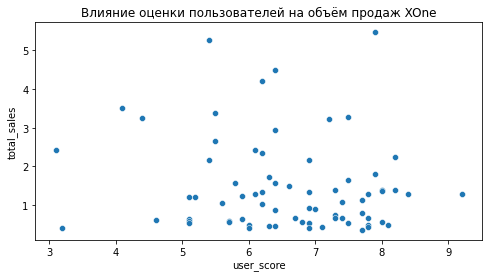

In [102]:
#Построим диаграмму рассеяния для оценки пользователей
plt.figure(figsize=(8,4))
sns.scatterplot(x='user_score', y='total_sales', data=df_sco_XOne)
plt.title('Влияние оценки пользователей на объём продаж XOne');

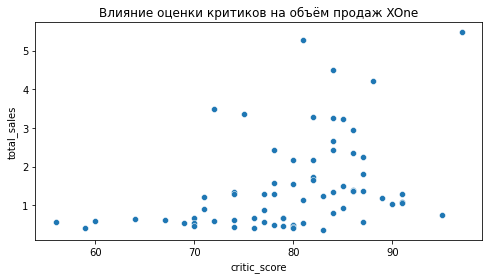

In [103]:
#Построим диаграмму рассеяния для оценки критиков
plt.figure(figsize=(8,4))
sns.scatterplot(x='critic_score', y='total_sales', data=df_sco_XOne)
plt.title('Влияние оценки критиков на объём продаж XOne');

**Вывод для XOne**

Корреляция между оценкой пользователей и объёмом продаж для XOne - -0.14 - обратная слабая корреляция

Корреляция между оценкой критиков и объёмом продаж для XOne - 0.38 - прямая выраженная корреляция

Таким образом, оценка критиков оказывает прямое, довольно серьёзное влияние на продажи игр для платформы XOne, отзывы покупателей демонстрируют слабое обратное влияние на продажи.  

**Анализ для 3DS**

In [104]:
# отобрана платформа3DS
df_sco_3DS = df_work_14_16_max.loc[df_work_14_16_max['platform'] == '3DS']

In [105]:
# Корреляция между оценкой критиков и объёмом продаж
df_sco_3DS['critic_score'].corr(df_sco_3DS['total_sales'])
print('Корреляция между оценкой критиков и объёмом продаж для 3DS - {:.3}'.format(df_sco_3DS['critic_score'].corr(df_sco_3DS['total_sales'])))

Корреляция между оценкой критиков и объёмом продаж для 3DS - 0.208


In [106]:
# Корреляция между оценкой пользователей и объёмом продаж
df_sco_3DS['user_score'].corr(df_sco_3DS['total_sales'])
print('Корреляция между оценкой пользователей и объёмом продаж для 3DS - {:.3}'.format(df_sco_3DS['user_score'].corr(df_sco_3DS['total_sales'])))

Корреляция между оценкой пользователей и объёмом продаж для 3DS - 0.259


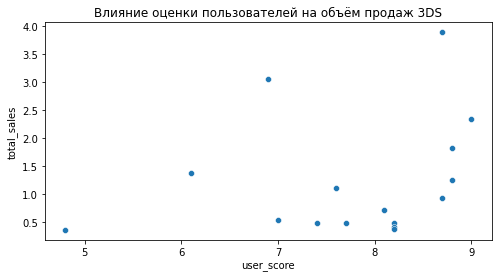

In [107]:
#Построим диаграмму рассеяния оценки пользователей
plt.figure(figsize=(8,4))
sns.scatterplot(x='user_score', y='total_sales', data=df_sco_3DS)
plt.title('Влияние оценки пользователей на объём продаж 3DS');

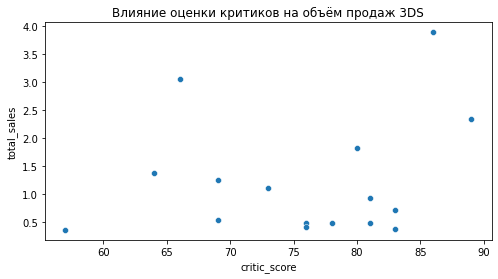

In [108]:
#Построим диаграмму рассеяния оценки критиков
plt.figure(figsize=(8,4))
sns.scatterplot(x='critic_score', y='total_sales', data=df_sco_3DS)
plt.title('Влияние оценки критиков на объём продаж 3DS');

**Вывод для 3DS**


Корреляция между оценкой пользователей и объёмом продаж для 3DS - 0.259  - прямая корреляция

Корреляция между оценкой критиков и объёмом продаж для 3DS - 0.2 - прямая корреляция


Таким образом, оценки критиков и отзывы покупателей демонстрируют - прямое влияние на продажи игр для консоли 3DS.

**Общий вывод**

**Оценки критиков имеют более существенное влияние на продажи игр, нежели пользовательские отзывы**

**Посмотрим на рейтинги от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.**

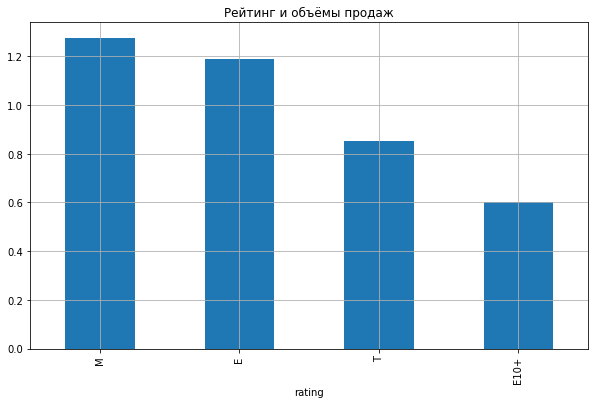

In [162]:
# визуализируем рейтинги от организации ESRB в разрезе продаж
df_rati =df_work_14_16_max.groupby('rating')['total_sales'].median().sort_values(ascending=False)
df_rati.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Рейтинг и объёмы продаж');

**M. Один из самых желаемых рейтингов среди любителей условно "взрослых" проектов.**

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [163]:
df_work_14_16

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.00,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.00,-1,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.00,-1,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01


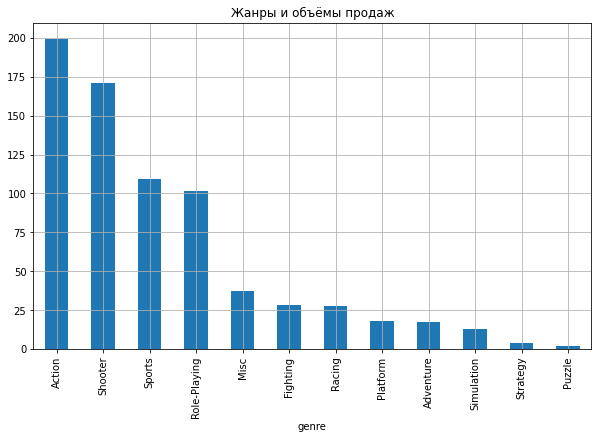

In [164]:
# визуализируем жанры в разрезе продаж
df_games_sale =df_work_14_16.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
df_games_sale.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Жанры и объёмы продаж');

Самый популярный и продаваемый - экшн;

самый неполулярный - пазлы.

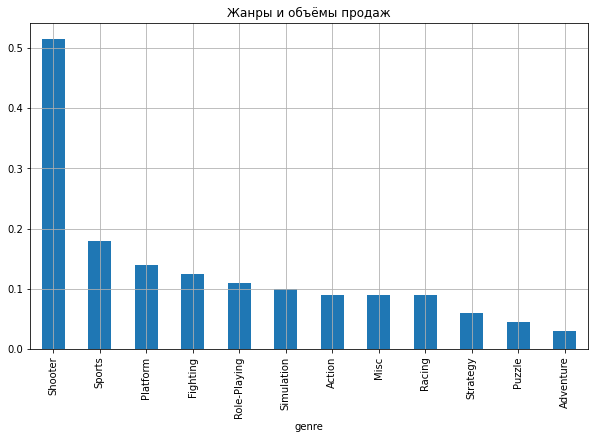

In [165]:
# визуализируем жанры в разрезе медианных значений продаж
df_games_sale =df_work_14_16.groupby('genre')['total_sales'].median().sort_values(ascending=False)
df_games_sale.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Жанры и объёмы продаж');

**Вывод по жанрам**

При формировании информации о популярности жанров было применено несколько критериев:

1. в зависимости от общего объёма продаж получены показатели:

самый популярный и продаваемый - экшн;

самый неполулярный - пазлы.

2. при оценке по медианным показателям продаж, позволяющим нивелировать всплески:

самый популярный - шутер;

самый неполулярный - приключения.

## Составим портрет пользователя каждого региона

In [114]:
# популярные платформы
df_platfo = df_work_14_16.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5)
df_platfo  

platform
PS4    288.15
XOne   140.36
3DS     86.68
PS3     68.18
X360    48.22
Name: total_sales, dtype: float64

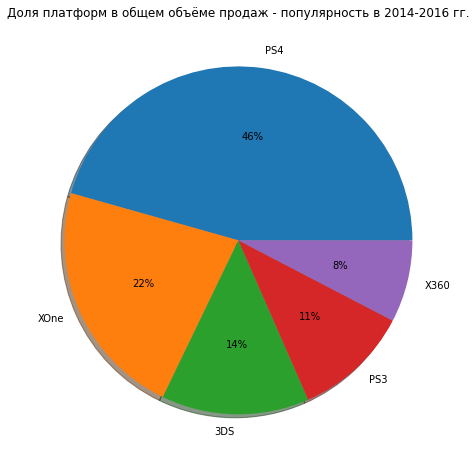

In [115]:
# визуализируем доли популярных платформ в общем объёме
df_platfo.plot(y='total_sales', kind='pie', figsize=(8, 8),  autopct='%1.0f%%', shadow=True, title='Доля платформ в общем объёме продаж - популярность в 2014-2016 гг.');
ax = plt.gca();
ax.set_ylabel('');

**ТОР - 5 платформ:**

PS4 - объём продаж (млн.копий) -  288 - 46%

XOne - объём продаж (млн.копий) - 140 - 22%

3DS - объём продаж (млн.копий) - 15.14 - 14%

PS3 - объём продаж (млн.копий) - 68 - 11%

X360- объём продаж (млн.копий) - 48 - 8%

In [116]:
# популярные платформы США
na_platforms = df_work_14_16.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False).head(5)
na_platforms['%'] = na_platforms['na_sales'] / na_platforms['na_sales'].sum() * 100
display(na_platforms)

# популярные платформы Европы
eu_platforms = df_work_14_16.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head(5)
eu_platforms['%'] = eu_platforms['eu_sales'] / eu_platforms['eu_sales'].sum() * 100
display(eu_platforms)

# популярные платформы Японии
jp_platforms = df_work_14_16.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head(5)
jp_platforms['%'] = jp_platforms['jp_sales'] / jp_platforms['jp_sales'].sum() * 100
display(jp_platforms)

# популярные платформы прочих регионов мира
other_sales_platforms = df_work_14_16.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum').sort_values('other_sales', ascending = False).head(5)
other_sales_platforms['%'] = other_sales_platforms['other_sales'] / other_sales_platforms['other_sales'].sum() * 100
display(other_sales_platforms)

,na_sales,%
platform,,
PS4,98.61,39.00
XOne,81.27,32.14
X360,28.30,11.19
3DS,22.64,8.95
PS3,22.05,8.72


,eu_sales,%
platform,,
PS4,130.04,55.12
XOne,46.25,19.60
PS3,25.54,10.83
PC,17.97,7.62
3DS,16.12,6.83


,jp_sales,%
platform,,
3DS,44.24,47.92
PS4,15.02,16.27
PSV,14.54,15.75
PS3,11.22,12.15
WiiU,7.31,7.92


,other_sales,%
platform,,
PS4,44.48,59.78
XOne,12.52,16.83
PS3,9.37,12.59
X360,4.35,5.85
3DS,3.68,4.95


В результате анализа установлено, что лидирующие позиции занимают PS4 и XOne, только страна Восходящего солнца имеет собственного лидера -3DS.		  

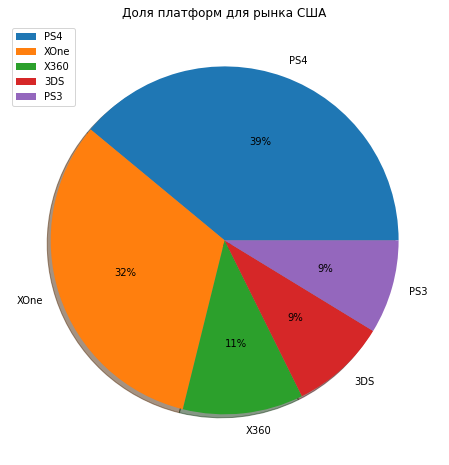

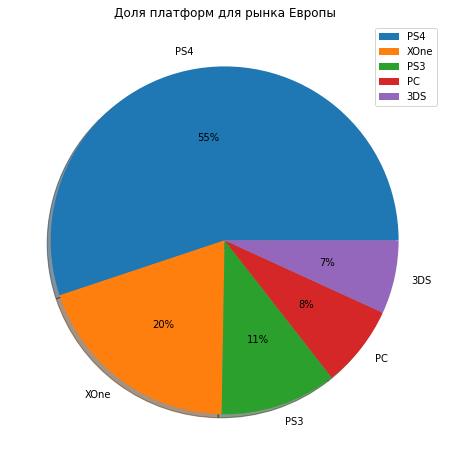

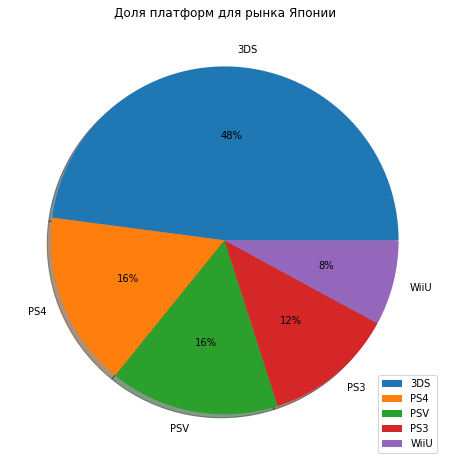

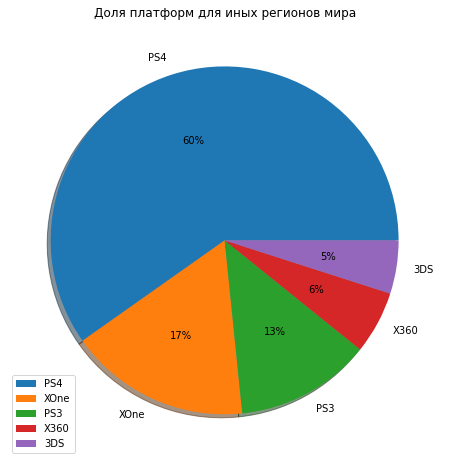

In [117]:
# визуализируем доли популярных платформ в США
na_platforms.plot(y='na_sales', kind='pie', figsize=(8, 8),  autopct='%1.0f%%', shadow=True, title='Доля платформ для рынка США');
ax = plt.gca();
ax.set_ylabel('');

# визуализируем доли популярных платформ в Европе
eu_platforms.plot(y='eu_sales', kind='pie', figsize=(8, 8),  autopct='%1.0f%%', shadow=True, title='Доля платформ для рынка Европы');
ax = plt.gca();
ax.set_ylabel('');

# визуализируем доли популярных платформ в Японии
jp_platforms.plot(y='jp_sales', kind='pie', figsize=(8, 8),  autopct='%1.0f%%', shadow=True, title='Доля платформ для рынка Японии');
ax = plt.gca();
ax.set_ylabel('');

# визуализируем доли популярных платформ в прочих регионах мира
other_sales_platforms.plot(y='other_sales', kind='pie', figsize=(8, 8),  autopct='%1.0f%%', shadow=True, title='Доля платформ для иных регионов мира');
ax = plt.gca();
ax.set_ylabel('');

### Самые популярные жанры (топ-5). Поясним разницу.

In [118]:
# Популярные жанры в США
na_genre = df_work_14_16.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'mean').sort_values('na_sales', ascending = False).head(5)
print('Популярные жанры в США')
display(na_genre)
# Популярные жанры в Европе
eu_genre = df_work_14_16.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'mean').sort_values('eu_sales', ascending = False).head(5)
print('Популярные жанры в Европе')
display(eu_genre)
# Популярные жанры в Японии
jp_genre = df_work_14_16.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'mean').sort_values('jp_sales', ascending = False).head(5)
print('Популярные жанры в Японии')
display(jp_genre)
# Популярные жанры в иных регионах мира
other_genre = df_work_14_16.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'mean').sort_values('other_sales', ascending = False).head(5)
print('Популярные жанры в иных регионах мира')
display(other_genre)

Популярные жанры в США


,na_sales
genre,
Shooter,0.62
Sports,0.29
Fighting,0.21
Platform,0.18
Role-Playing,0.15


Популярные жанры в Европе


,eu_sales
genre,
Shooter,0.51
Sports,0.28
Racing,0.20
Platform,0.18
Simulation,0.17


Популярные жанры в Японии


,jp_sales
genre,
Role-Playing,0.14
Fighting,0.11
Platform,0.07
Puzzle,0.07
Simulation,0.05


Популярные жанры в иных регионах мира


,other_sales
genre,
Shooter,0.17
Sports,0.09
Platform,0.05
Fighting,0.05
Racing,0.04


**ТОР - 5 жанров:**
Пятёрка популярных жанров для различных регионов имеет двух устойчивых лидеров Shooter и Sports, далее следуют  Fighting, Platform, Racing, Simulation	меняясь местами. Япония вновь демонстрирует осбенное отношение: на первом месте Role-Playing, далее Fighting, Platform,	Puzzle, Simulation	

### Влияет ли рейтинг ESRB на продажи в отдельном регионе? 
ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [119]:
# сформируем группу по рейтингу и продажам в Северной Америке
df_na_sales = df_work_14_16.groupby('rating')['na_sales'].median().sort_values(ascending = False).head(5)
df_na_sales

rating
M      0.12
E10+   0.10
E      0.05
T      0.03
-1     0.00
Name: na_sales, dtype: float64

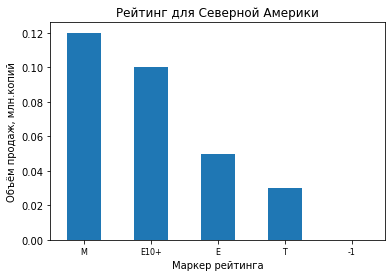

In [120]:
# визуализируем маркеры рейтинга по ESRB в разрезе продаж для Северной Америки
df_na_sales.plot.bar(rot=45)
plt.ylabel('Объём продаж, млн.копий');
plt.xlabel('Маркер рейтинга');
plt.title('Рейтинг для Северной Америки');
plt.xticks(rotation=0,fontsize=8);

In [121]:
# сформируем группу по рейтингу и продажам в Европе
df_eu_sales = df_work_14_16.groupby('rating')['eu_sales'].median().sort_values(ascending = False).head(5)
df_eu_sales

rating
M      0.12
E10+   0.09
E      0.05
T      0.04
-1     0.00
Name: eu_sales, dtype: float64

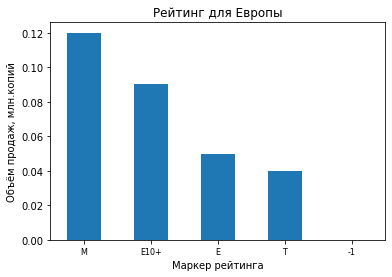

In [122]:
# визуализируем маркеры рейтинга по ESRB в разрезе продаж для Европы
df_eu_sales.plot.bar(rot=45)
plt.ylabel('Объём продаж, млн.копий');
plt.xlabel('Маркер рейтинга');
plt.title('Рейтинг для Европы');
plt.xticks(rotation=0,fontsize=8);

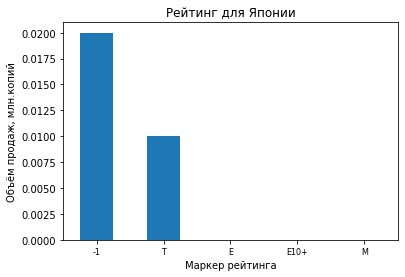

In [123]:
# сформируем группу по рейтингу и продажам и визуализируем маркеры рейтинга по ESRB в разрезе продаж для Японии  
df_jp_sales = df_work_14_16.groupby('rating')['jp_sales'].median().sort_values(ascending = False).head(5).plot.bar(rot=45)
plt.ylabel('Объём продаж, млн.копий');
plt.xlabel('Маркер рейтинга');
plt.title('Рейтинг для Японии');
plt.xticks(rotation=0,fontsize=8);

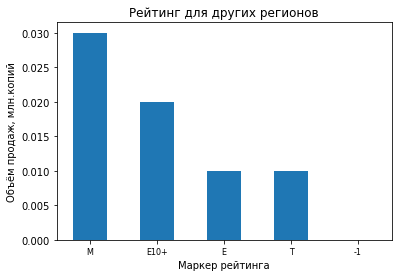

In [124]:
# сформируем группу по рейтингу и продажам и визуализируем маркеры рейтинга по ESRB в разрезе продаж в других регионах
df_other_sales = df_work_14_16.groupby('rating')['other_sales'].median().sort_values(ascending = False).head(5).plot.bar(rot=45)
plt.ylabel('Объём продаж, млн.копий');
plt.xlabel('Маркер рейтинга');
plt.title('Рейтинг для других регионов');
plt.xticks(rotation=0,fontsize=8);

Для Северо-Американского и Европейского рынка характерны более высокие объёмы реализации продукции, маркированной М, что подтвекрждает ранее увиденную общемировую тенденцию. Однако,в Японии есть собственная структура - CERO, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии, поэтому сведения о ESRB для данного рынка отсутствуют.

Отмечу, что данный рейтинг вряд ли может влиять на продажи, на них большее влияние оказывают интересы отдельных игроков, чем острое стремление следовать рейтингу. Рейтинг может оказывать влияние на решение о покупке продукции для детей. Но, я например, на него никогда не обращала внимания до настоящего исследования.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>

Согласна. Скорее всего, дело тут в том, что ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на Западе и на Востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.

</div>

## Проверим гипотезы

Зададим самостоятельно пороговое значение alpha и поясним: как сформулировали нулевую и альтернативную гипотезы; 
Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [125]:
# моя исследуемая совокупность не является большой, 
# поэтому я рассчитаю среднюю пользовательскую оценку для платформ и сравню
df_x = df_work_14_16.query('user_score > 0')
df_x

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.70,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.00,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.50,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.20,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1,6.60,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.50,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.70,-1,0.01


In [126]:
df_p = df_x.groupby('platform')['user_score'].mean().sort_values(ascending = False)
df_p

platform
PSV    7.66
3DS    7.14
WiiU   7.09
PS4    6.83
XOne   6.59
Wii    6.35
PC     6.30
PS3    6.01
X360   5.77
Name: user_score, dtype: float64

Формулировка:

Н_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н_1: Средние пользовательские рейтинги платформ Xbox One и PC разные

Я исследую независимые друг от друга равные по размеру данные.

*Двусторонняя гипотеза H_0, которую можно сформулировать таким образом, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Я при помощи метода st.ttest_ind() выполню расчёт

In [127]:
df_PC = df_x[df_x['platform'] == 'PC']
df_XOne = df_x[df_x['platform'] == 'XOne']
alpha = 0.05

result = st.ttest_ind(df_PC['user_score'], df_XOne['user_score'])

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('Не получилось отвергнуть нулевую гипотезу -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу -  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


**гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергнута.**

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные.

In [128]:
# моя исследуемая совокупность не является большой, 
# поэтому я рассчитаю среднюю пользовательскую оценку для платформ и сравню
df_e = df_x.groupby('genre')['user_score'].mean().sort_values(ascending = False)
df_e

genre
Puzzle         7.97
Adventure      7.47
Role-Playing   7.35
Strategy       7.22
Fighting       6.98
Misc           6.97
Action         6.76
Platform       6.74
Shooter        6.55
Simulation     6.50
Racing         6.33
Sports         5.23
Name: user_score, dtype: float64

Формулировка:

средние пользовательские рейтинги жанров Action и Sports одинаковые.

средние пользовательские рейтинги жанров Action и Sports разные.

Я исследую независимые друг от друга равные по размеру данные.

*Двусторонняя гипотеза H_0, которую можно сформулировать таким образом, что средние пользовательские рейтинги жанров Action и Sports разные.*

Я при помощи метода st.ttest_ind() выполню расчёт


In [129]:
df_action = df_x.query('genre == "Action"')
df_sports = df_x.query('genre == "Sports"')


alpha = 0.05

result = st.ttest_ind(df_action['user_score'], df_sports['user_score'])

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу-средние пользовательские рейтинги жанров Action и Sports разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу-средние пользовательские рейтинги жанров Action и Sports разные')



p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу-средние пользовательские рейтинги жанров Action и Sports разные


**гипотеза -cредние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные - не подтверждена**

<div class="alert alert-info"  role="alert", style="border: 1px solid black; padding: 20px">
<font size="4", color = "DimGrey"><b>🦊 Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
        Это цитата из курса Статанализа, который я проходила на платформе: "Статистика разности поможет сориентироваться, отвергать ли нулевую гипотезу, но точное решение следует принимать по p-value.
Что такое p-value?
Это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна."
        
Это материал из сети, http://datascientist.one/p-value/       
Говоря простым языком, уровень значимости показывает, насколько мы уверены в наших результатах. Низкое значение для значимости соответствует низкой вероятности того, что экспериментальные результаты получились случайно, и наоборот. Уровни значимости записываются в виде десятичных дробей (таких как 0.01), что соответствует вероятности того, что экспериментальные результаты мы получили случайно (в данном случае вероятность этого 1%).

По соглашению, ученые обычно устанавливают уровень значимости своих экспериментов равным 0.05, или 5%.[2] Это означает, что экспериментальные результаты, которые соответствуют такому критерию значимости, только с вероятностью 5% могли получиться чисто случайно. Другими словами, существует 95% вероятность, что результаты были вызваны тем, как ученый манипулировал экспериментальными переменными, а не случайно. Для большинства экспериментов 95% уверенности наличия связи между двумя переменными достаточно, чтобы считать, что они «действительно» связаны друг с другом.
        
        
 Везде речь идёт о вероятности. Буду благодарна за твои пояснения (ссылки), потому что пока самостоятельно разобраться трудно.       

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
Да, проблема в том, что везде очень категоричные определения вводятся. Да, мы интерпретируем альфу как вероятность ошибки первого рода. При тестировании гипотезы (при вычислении pvalue) мы уже предполагаем, что нулевая верна. Как тогда pvalue может быть вероятностью, что гипотеза верна? То же самое с отклонениями. Мы уже предполагае (приняв нулевую), что отклонения случайны. То есть не совсем корректно говорить об этой величине как о вероятности, вот и все. Почитать подробнее можешь [тут](https://en.wikipedia.org/wiki/Misuse_of_p-values). Статья на английском, но можно включить переводчик при необходимости.  </div>

**Вывод по итогам работы*:

**1. Знакомство с данными и формирование плана необходимых действий по подготовке к работе.**

К исследованию представлен датафрейм, содержащий 16715 строк и 11 столбцов. Очевидны пропуски. 

Требовалось выполнение следующих действий:

согласно заданию привести к нижнему регистру наименования столбцов;

в столбцах Name и Genre содержится по 2 пропуска, будут удалены;

в Year_of_Release и в столбцах со значением пропусков 40% и более, будет проставлено '-1', как символ отсутствия данных в столбцах  с информацией о рейтингах;

столбец Critic_Score подвергнется замене типа данных на 
целочисленный.

**2. Подготовка данных.**

Наименования приведены к нижнему регистру.

Анализом неинформативности установлено, что высокой уникальностью обладает столбец Name — название игры и это приципиально важно для нашего анализа. Остальные исследуемые группы имеют неуникальное содержание по объективным причинам(повторение наименование жанра или года выпуска).

По признаку релеватности все столбцы содержат данные, влияющие на результат. Удаление столбцов не требуется.

Приведённый датафрейм не содержит дубликатов.

В столбце name заменены пропуски, замена типа данных не требуется.

В столбце platform отсутствуют пропуски, 31 уникальное значение, замена типа данных не требуется

В столбце year_of_release произведена замена типа данных и заполнены пропуски.

В столбце genre пропуски заполнены, 12 уникальных значений, замена типа данных не требуется.

Сведения о продажах  содержат данные в млн. проданных копий, замена типа данных не требуется, пропусков нет.

Наиболее часто встречается аббривеатура tbd, в разговороном английском "будет определно", "будет обсуждаться". Согласно словарю терминов (глоссарий) по разработке требований (Вигерс, 2013, https://analytics.infozone.pro/requirements-analysis/glossary-requirements-development-wiegers-2013/) - служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Таким образом, можно предположить, что данная отметка говорит о том, что формирование рейтинга ещё не завершено. Проведена замена на -1, как и в иных случаях неопределённости.

В столбце rating выявлено 3 записи К-А, которые соответствуют обозначению рейтинга Е, переименованы. Произведена замена типа данных и пропусков на -1, как и в иных случаях неопределённости.

Дана оценка наличию выбросов в столбцах с данными о реализации копий игр в различных регионах: всплески в районе 0 - это отсутствие данных о продажах.

Дана оценка наличию выбросов в столбцах с данными о рейтингах игр в различных регионах: всплески в районе 0 - это отсутствие данных о продажах.

**Две самые популярные платформы:**

Доля платформы PlayStation 2:12.93%

Доля платформы Nintendo DS:12.87%

**Самые крупные релизы происходили в 2008 и 2009гг.**

**Проведение исследовательского анализа данных.**

**Выпуск игр в разные годы**

В 2000-е игры выходят в интернет и становятся широкодоступны;

игр, выпущенных до 2000г - 2245; 

игр, выпущенных после 2000г - 14 470.

В исследуемом периоде (с 2000г.) резкий подъём начался с 2004г., максимальный выпуск игр пришёлся на период 2008г. - начало 2010г., затем произошёл значительный спад, продолжавшийся до 2013г.

**Изменения объёмов продаж по платформам.**

**Средняя продолжительность "жизни" платформы около 10 лет.**



# Аналитическая часть выводов

**Выбраны несколько потенциально прибыльных платформ. Дана оценка перспективности.**

**К исследованию для прогнозирования принят период с 2014 по 2016гг.**
 
**Динамика продаж различных платформ**

В 2014-2016гг все отобранные платформы демонстрировали устойчивую тенденцию к снижению объёмов реализации. Что и неудивительно, учитывая внедрение мобильных телефонов и других портативных устройств. 

**Наименьший, хотя и значительный темп падения уровня продаж демонстрирует PS4.**

**Прирост продаж не демонстрируется в исследуемом периоде.**

**Лидерами продаж установлены (млн. копий):**

PS4	288.15;

XOne 140.36;

3DS	86.68;

PS3	68.18;

X360 48.22;

WiiU 42.98;

PC	27.05;

PSV	22.40;

Wii	5.07;

PSP	0.36.

**Максимальное падение PSP.**

**Я полагаю, что при таком раскладе сил неуместно рекомендовать перспективные платформы. Если только искомой перспективной не является наиболее медленный спад объёмов продаж**

**Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

В целом мировые продажи в совокупности составили в среднем от 9 до 50 млн.копий во всех исследуемых регионах мира. 

**2014-2016гг**

В 2014-2016 наибольший средний объём реализации приходился на Wii и доходил почти до 1 млн. копий. На втором месте был PS4, далее XOne, WiiU.

**В разрезе лет**

**2014г**

В 2014г лидером по среднему уровню продаж выступала портативная консоль Nintendo 3DS с продажами, подступающими к 4 млн.копий и значительным отклонением в положительную сторону, что свидетельствует о высоком успехе на отдельных рынках. Вторым по значимости игроком была игровая приставка восьмого поколения, выпускаемая японской компанией Sony - PS4, имевшая объём реализации около 2,9 млн.копий и  значительным отклонением в положительную сторону.  XOne - третья по счёту игровая приставка от компании Microsoft, являющаяся преемницей Xbox 360 - демонстрировала схожую динамику от 1,8 до 2,8 млн.копий.

**2015г**

В 2015г лидером по среднему уровню продаж выступала игровая приставка от Sony - PS4, имевшаю объём реализации около 2,5 млн.копий и  значительным отклонением в положительную сторону. Вторым по значимости игроком стала портативная консоль Nintendo 3DS с продажами, около 2 млн.копий и значительным отклонением в положительную сторону, что свидетельствует о высоком успехе на отдельных рынках. И, вновь, третье место - XOne - демонстрировала схожую динамику от 0,8 до 1,8 млн.копий. Очевидно общее падение темпов роста на рынке.

**2016**

В 2016г наиболее прибыльные платформы показали следующую динамику: 

реализация PS4 (от японской компании Sony) в среднем составляла от 0,4 до 1,3 млн.копий плюс значительные всплески на отдельных рынках. 

XOne - являющаяся преемницей Xbox 360 - демонстрировала схожую динамику от 0,4 до 1,1 млн.копий. 

WiiU от Nintendo в 2016г потеснила на рынке 3DS c 0,7 млн.копий.

**Дана оценка влиянию пользовательских отзывов и оценок критиков на продажи**.

Корреляция между оценкой пользователей и объёмом продаж в целом для рынка Северной Америки:-0,025

Корреляция между оценкой пользователей и объёмом продаж в целом для рынка Европы:-0,083

Корреляция между оценкой пользователей и объёмом продаж в целом для рынка Японии:0,26

Корреляция между оценкой пользователей и объёмом продаж в целом для иных рынков:-0,055


Корреляция между оценкой критиков и объёмом продаж для рынка Северной Америки:0,35

Корреляция между оценкой критиков и объёмом продаж для рынка Европы:0,25

Корреляция между оценкой критиков и объёмом продаж для рынка Японии:0,089

Корреляция между оценкой критиков и объёмом продаж для иных рынков:0,29

**Таким образом, оценка критиков оказывает прямое и более сильное влияние на продажи игр в мире, нежели отзывы покупателей.**
**Анализ для PS4**

Корреляция между оценкой пользователей и объёмом продаж для PS4 - -0.096- обратная слабая корреляция.

Корреляция между оценкой критиков и объёмом продаж для PS4 - 0.43 - прямая корреляция, выраженная.

Таким образом, оценка критиков оказывает прямое и сильное влияние на продажи игр для платформы PS4, в отличие от отзывов покупателей, имеющих обратное влияние.
Особенности корреляции ближе всего к рынку Северной Америки.

**Анализ для XOne**

Корреляция между оценкой пользователей и объёмом продаж:-0,1 - слабая обратная корреляция

Корреляция между оценкой критиков и объёмом продаж:0,11 - прямая слабая корреляция

**Таким образом, оценка критиков оказывает прямое, но слабое влияние на продажи игр для платформы XOne, отзывы покупателей демонстрируют слабое обратное влияние на продажи.  Следует отметить, что часть неплохо продающихся игр не получила оценки критиков.**

**Анализ для 3DS**
Корреляция между оценкой пользователей и объёмом продаж для 3DS - 0.259  - прямая корреляция

Корреляция между оценкой критиков и объёмом продаж для 3DS - 0.2 - прямая корреляция


Таким образом, оценки критиков и отзывы покупателей демонстрируют - прямое влияние на продажи игр для консоли 3DS.

**Общий вывод**

**В целом, оценки критиков и пользователей не имеют серьёзного влияния на продажи игр. Но оценки критиков имеют более существенное влияние на продажи игр, нежели пользовательские отзывы **

**Просмотрены рейтинги от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.**

**M. Один из самых желаемых рейтингов среди любителей условно "взрослых" проектов.**

**Дана оценка общему распределению игр по жанрам.**

При формировании информации о популярности жанров было применено несколько критериев:

1. в зависимости от общего объёма продаж получены показатели:

самый популярный и продаваемый - экшн;

самый неполулярный - пазлы.

2. при оценке по медианным показателям продаж, позволяющим нивелировать всплески:

самый популярный - шутер;

самый неполулярный - приключения.

**Портрет пользователя каждого региона**

**Самые популярные платформы (топ-5) в мире.** 

PS4 - объём продаж (млн.копий) - 288 - 46%

XOne - объём продаж (млн.копий) - 140 - 22%

3DS - объём продаж (млн.копий) - 15.14 - 14%

PS3 - объём продаж (млн.копий) - 68 - 11%

X360- объём продаж (млн.копий) - 48 - 8% 

**Несомненный лидер в Европе и США  - PS4, однако, в Японии лидирует 3DS**

**Самые популярные жанры (топ-5):**

Shooter и Sports лидируют в США и Европе.

Популярные жанры, например в США
Shooter
	
Sports	

Fighting	

Platform	

Role-Playing	

Японские предпочтения отличаются:
	
Role-Playing
	
Fighting	

Platform	

Puzzle
	
Simulation
	
**Влияние рейтинга ESRB на продажи в отдельном регионе**

Для Северо-Американского и Европейского рынка характерны более высокие объёмы реализации продукции, маркированной М, что подтвекрждает ранее увиденную общемировую тенденцию. Однако,в Японии есть собственная структура - CERO, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии, поэтому сведения о ESRB для данного рынка отсутствуют.

Отмечу, что данный рейтинг врядли может влиять на продажи, на них большее влияние оказывают интересы отдельных игроков, чем острое стремление следовать рейтингу. Рейтинг может оказывать влияние на решение о покупке продукции для детей. Но, я например, на него никогда не обращала внимания до настоящего исследования.

**Проверка гипотез:**

**гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отклонена.**

**гипотеза -cредние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные - не подтверждена.**
